# Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
elon_musk=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 11 text minig/Elon_musk.csv',encoding='latin1')
elon_musk

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
elon_musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
elon_musk=elon_musk.drop('Unnamed: 0',axis=1)
elon=elon_musk.copy()
elon

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [5]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [6]:
elon.shape

(1999, 1)

In [7]:
 ! pip install wordcloud

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import  WordCloud,STOPWORDS
wordnet=WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Osama
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
elon=[Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters
elon=[Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:30]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
tweet=''.join(elon)
tweet

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [11]:
import string
import warnings
warnings.filterwarnings('ignore')
import re
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text)
    text = re.sub(r"#", "", text) 
    text = re.sub(r"RT[\s]+", "", text) 
    text = re.sub(r"https?:\/\/\S+", "", text) 
    text = re.sub(r"_[A-Za-z0-9]", "", text)
    return text
elon_musk["Text"]=elon_musk["Text"].apply(cleantext)
elon_musk
    

Text
0                                          Im an alien
1     Aarmack Ray tracing on Cyberpunk with HDR is n...
2                                      Great interview!
3                                Doge is underestimated
4      Congratulations Tesla China for amazing execu...
...                                                 ...
1994   True, it sounds so surreal, but the negative ...
1995   Make sure to read ur terms &amp; conditions b...
1996                                     Samwise Gamgee
1997   Altho Dumb and Dumber is <U+0001F525><U+0001F...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [12]:
elon_musk.tail()

Text
1994   True, it sounds so surreal, but the negative ...
1995   Make sure to read ur terms &amp; conditions b...
1996                                     Samwise Gamgee
1997   Altho Dumb and Dumber is <U+0001F525><U+0001F...
1998                          Progress update August 28

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Osama
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
text_token=word_tokenize(tweet)

In [16]:
print(text_token[0:30])

['@', 'kunalb11', 'I\x92m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27']


In [17]:
len(text_token)

28456

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Osama
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words=stopwords.words('english')
stop_words.append('the')
no_stop_tokens=[word for word in text_token if not word in stop_words]
print(no_stop_tokens[0:40])

['@', 'kunalb11', 'I\x92m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!']


In [21]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[0:40])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimated', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!']


In [22]:
from nltk.stem import PorterStemmer 

In [23]:
stemmed_tokens=[PorterStemmer().stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tri', '?', '@', 'joerogan', '@', 'spotifi', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestim', '@', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happi', 'new', 'year', 'ox', '!', 'http', ':', '//t.co/9wfkmyu2ojfrodo', 'underdog']


In [26]:
tweet_em=re.sub("[^A-Za-z""]+"," ",tweet).lower()
tweet_em=re.sub("[0-9" "]+"," ",tweet)

In [27]:
tweet_rev_words=tweet_em.split(" ")


In [28]:
tweet_rev_string=" ".join(tweet_rev_words)

In [29]:
tweet_rev_string

'@kunalb  I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera  Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/ WFKMYu ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx  Haha thanks :)@flcnhvy @anonyx  Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/ rWE uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+ F ><U+ F >This is true power hah

In [30]:
nltk.download('stopwords')
stop_words=stopwords.words('english')
tweet_rev_words=[w for w in tweet_rev_words if not w in stop_words]
tweet_em=" ".join(tweet_rev_words)
tweet_em

[nltk_data] Downloading package stopwords to C:\Users\Osama
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'@kunalb  I\x92m alien@ID_AA_Carmack Ray tracing Cyberpunk HDR next-level. Have tried it?@joerogan @Spotify Great interview!@gtera  Doge underestimated@teslacn Congratulations Tesla China amazing execution last year. Now next even more!!Happy New Year Ox! https://t.co/ WFKMYu ojFrodo underdoge,\nAll thought would fail,\nHimself all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx  Haha thanks :)@flcnhvy @anonyx  Indeed! Tweets definitely represent real-world time allocation.The entertaining outcome likely@GiveDirectly Just sent someJust agree Clubhouse @kanyewesthttps://t.co/ rWE uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought Dogecoin lil X, toddler hodler@JoshManMode He definitely issues, sentencing seems bit high@freewalletorg Thanks fixing@freewalletorg Please unlock account@AstroJordy <U+ F ><U+ F >This true power haha https://t.co/Fc uhQSd O@freewalletorg Any crypto wallet won\x92t give private keys avoided costs@freewalletorg Your app sucksRT @SpaceX: NASA sele

In [31]:
wordcloud_ip=WordCloud(
            background_color='black',
            width=2000,
            height=1400,
            ).generate(tweet_em)

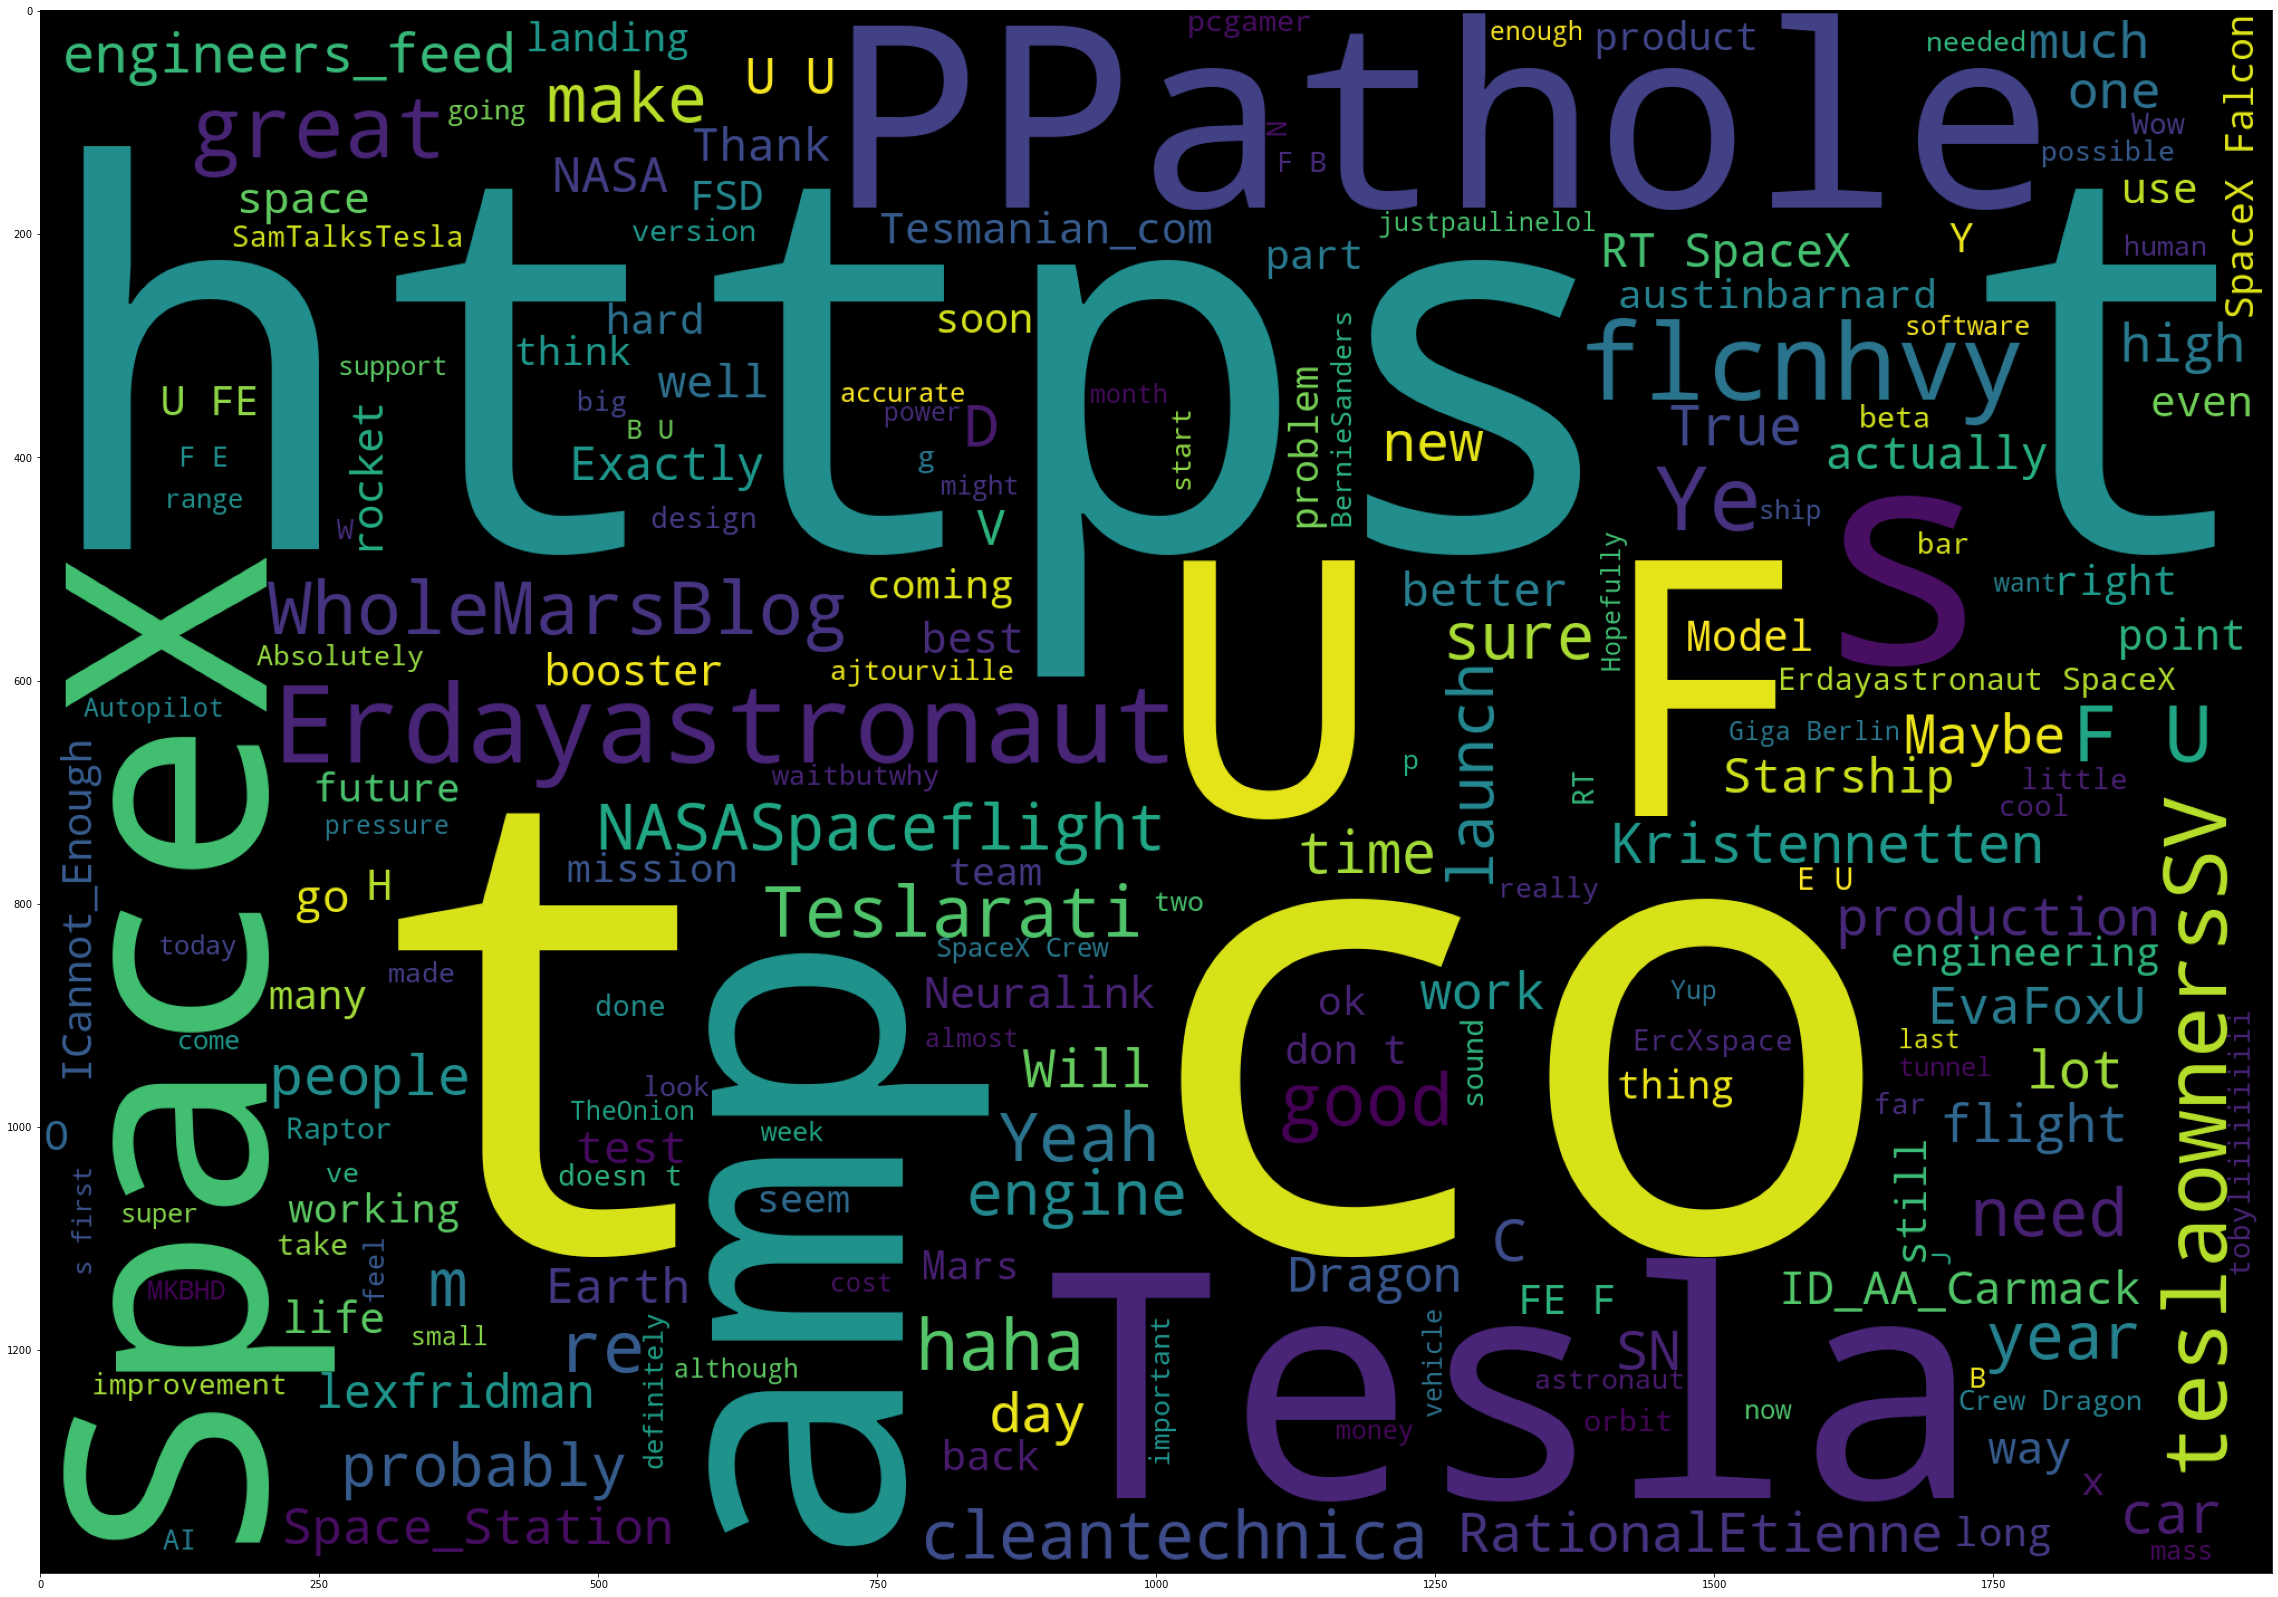

In [32]:
plt.figure(figsize=(40,30))
plt.imshow(wordcloud_ip)

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
with open("C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 11 text minig/positive-words.txt","r")as pos:
    pos_words=pos.read().split("\n")

In [37]:
pos_words[36:]

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordabl

In [38]:
with open("C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 11 text minig/negative-words.txt","r") as neg:
    neg_words=neg.read().split("\n")

In [39]:
neg_words[36:]

['2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 

In [40]:
with open("C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 11 text minig/stop.txt","r") as stop:
    stop_words=stop.read().split("\n")

In [41]:
stop_words[40:]

['appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'comes',
 'concerning',
 'consequently',
 'consider',
 'considering',
 'contain',
 'containing',
 'contains',
 'corresponding',
 'could',
 "couldn't",
 'course',
 'currently',
 'd',
 'definitely',
 'described',
 'despite',
 'did',
 "didn't",
 'different',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'done',
 'down',
 'downwards',
 'during',
 'e',
 'each',
 'edu',
 'eg',
 'eight',
 'either',
 'else',
 'elsewhere',
 'enough

In [42]:
positive_tweet=" ".join([w for w in tweet_rev_words if w in pos_words])

In [48]:
wordcloud_pos=WordCloud(background_color='black',width=1800,height=1400).generate(positive_tweet)

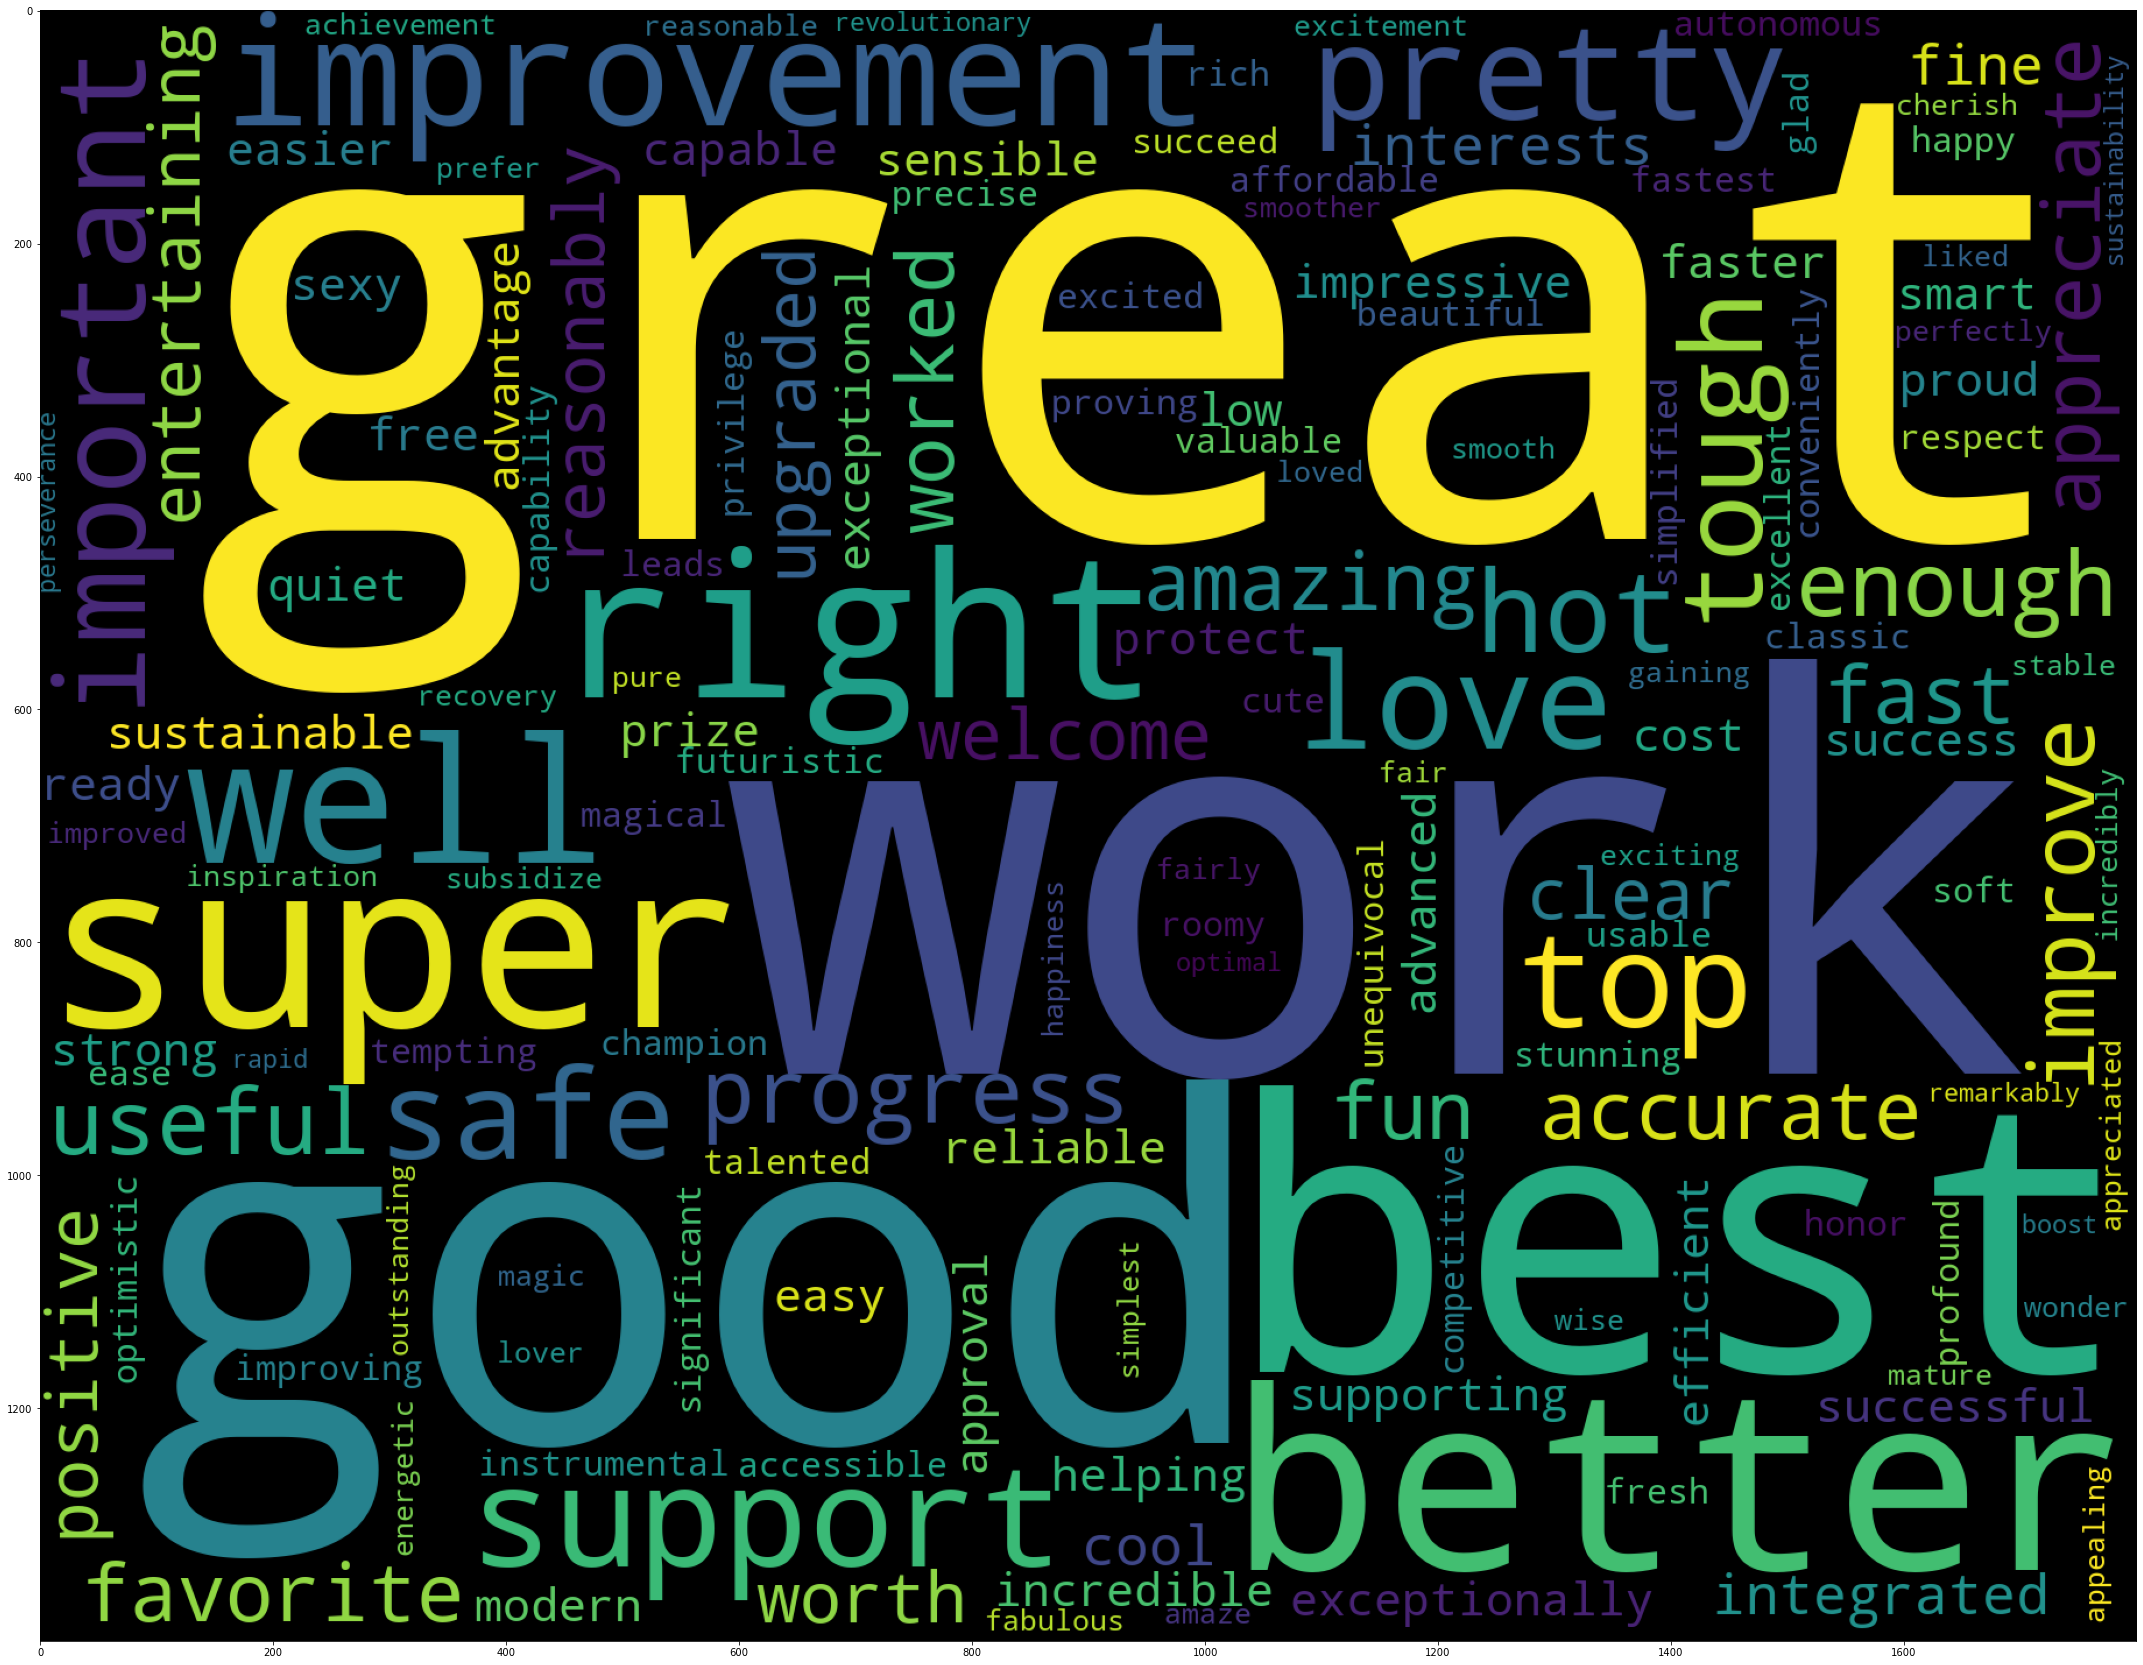

In [49]:
plt.figure(figsize=(40,30))
plt.imshow(wordcloud_pos)

In [51]:
tweet_neg=" ".join([w for w in tweet_rev_words if  w in neg_words])

In [52]:
wordcloud_neg=WordCloud(background_color="black",width=2000,height=1400).generate(tweet_neg)

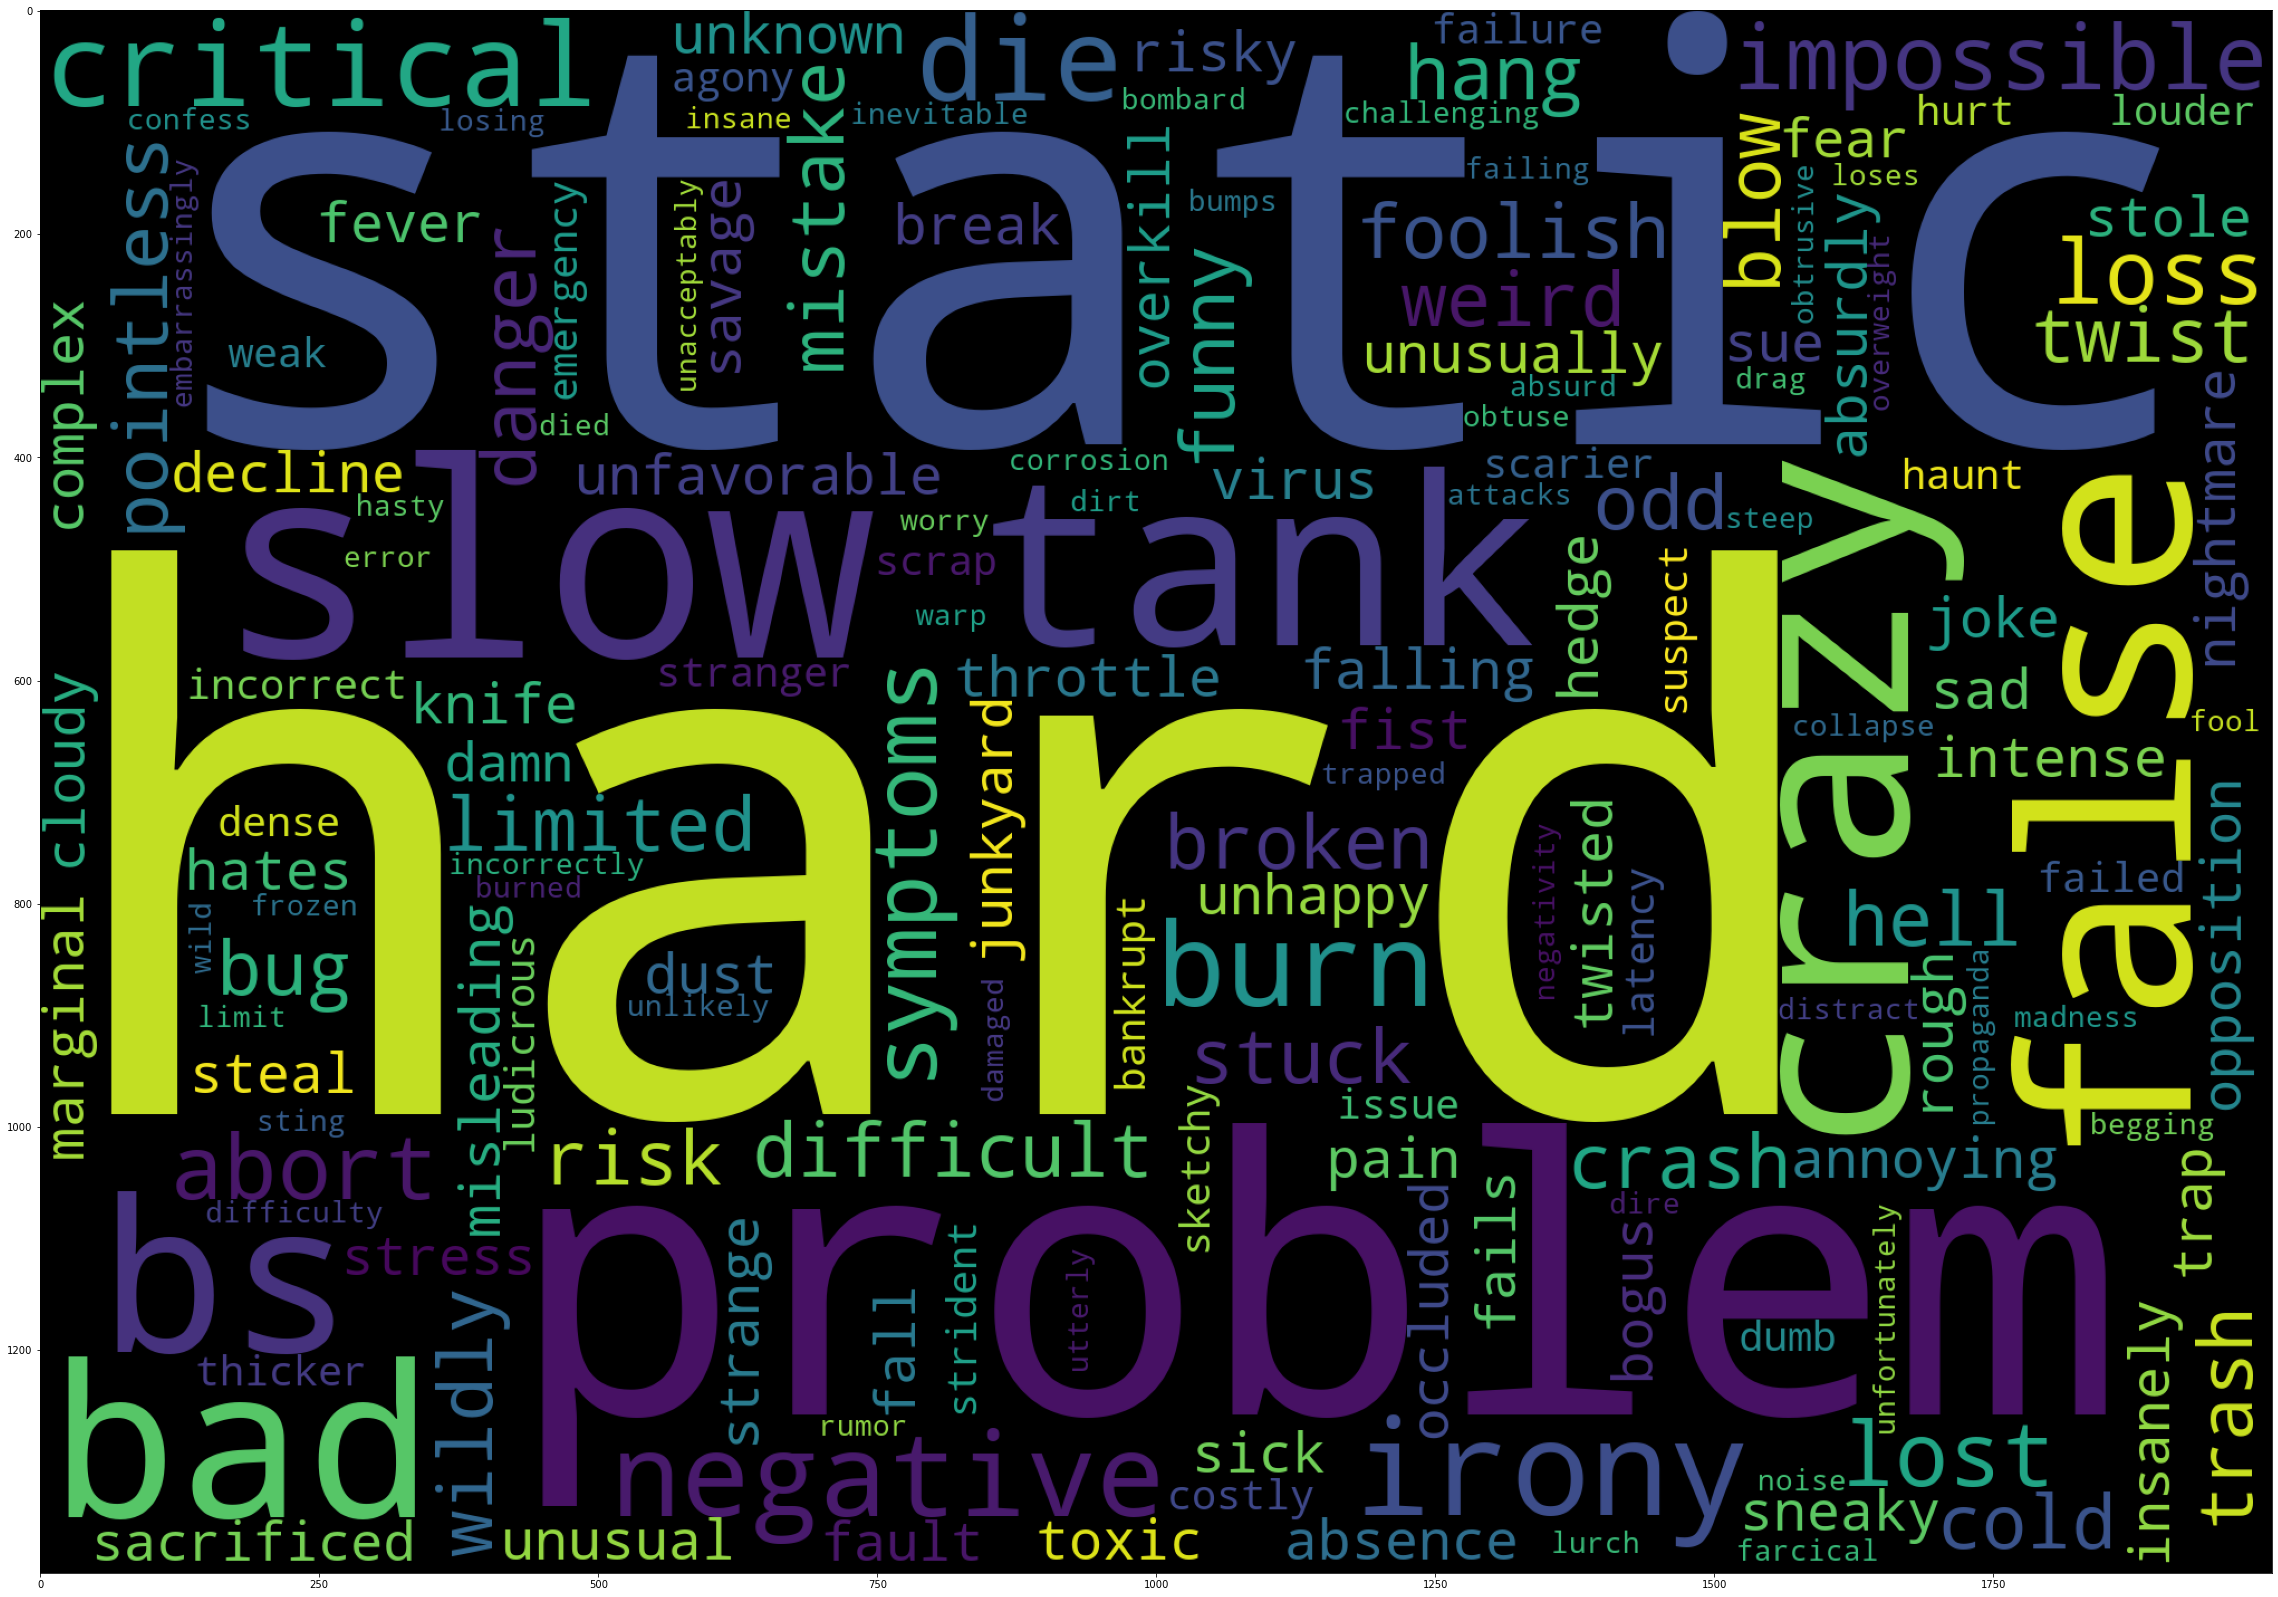

In [54]:
plt.figure(figsize=(40,30))
plt.imshow(wordcloud_neg)